In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
import scipy

## 读取数据 

In [73]:
df = pd.read_csv("./rankingcard.csv", index_col=0)

In [74]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [75]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


## 数据清洗 

### 消除重复项

In [77]:
df.drop_duplicates(inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [79]:
df.index = range(df.shape[0])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      145563 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


### 探索缺失值 

In [81]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [82]:
df.isnull().sum()/df.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [83]:
df.NumberOfDependents.fillna(int(df.NumberOfDependents.mean()), inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149391 non-null int64
RevolvingUtilizationOfUnsecuredLines    149391 non-null float64
age                                     149391 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149391 non-null int64
DebtRatio                               149391 non-null float64
MonthlyIncome                           120170 non-null float64
NumberOfOpenCreditLinesAndLoans         149391 non-null int64
NumberOfTimes90DaysLate                 149391 non-null int64
NumberRealEstateLoansOrLines            149391 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149391 non-null int64
NumberOfDependents                      149391 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


In [85]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                          0
dtype: int64

In [86]:
# 对于月收入使用随机森林进行添补
def fill_missing_rf(x, y, to_fill):
    """随机森林填充缺失值"""
    
    # 划分数据集
    df = x.copy()
    fill = df.loc[:, to_fill]
    
    df = pd.concat([df.loc[:, df.columns != to_fill], pd.DataFrame(y)], axis=1)
    Ytrain = fill[fill.notnull()]
    Ytest = fill[fill.isnull()]
    Xtrain = df.iloc[Ytrain.index, :]
    Xtest = df.iloc[Ytest.index, :]
    
    from sklearn.ensemble import RandomForestRegressor as rfr
        
    rfr = rfr(n_estimators=100)
    rfr = rfr.fit(Xtrain, Ytrain)
    Y_predict = rfr.predict(Xtest)
    
    return Y_predict    

In [87]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [88]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]
y_pred = fill_missing_rf(x, y, "MonthlyIncome")

In [89]:
# 进行数据填充
df.loc[df.loc[:, "MonthlyIncome"].isnull(), "MonthlyIncome"] = y_pred

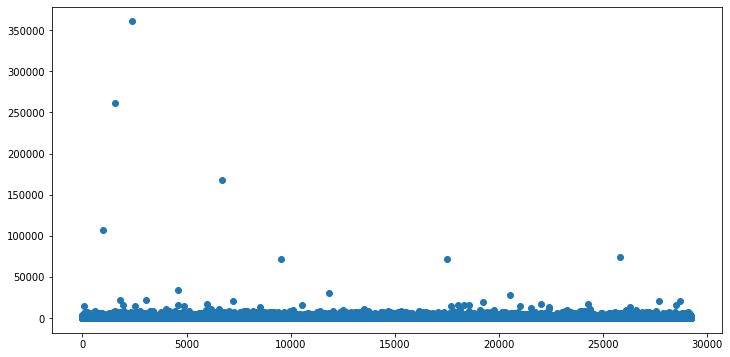

In [90]:
plt.figure(figsize=(12, 6))
plt.scatter(range(0, 29221), y_pred)
plt.show()

In [91]:
df.MonthlyIncome.isnull().sum()

0

In [92]:
df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

### 处理异常值

In [95]:
df.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5424.792195,13225.728594,0.0,0.0,0.170000,1800.000000,4423.000000,7416.000000,10800.000000,23200.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [97]:
( df.age == 0 ).sum()

1

In [98]:
df = df[df.age!=0]

In [99]:
df.age.describe()

count    149390.000000
mean         52.306587
std          14.725390
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

In [104]:
df[df.loc[:, "NumberOfTimes90DaysLate"]>90]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1732,1,1.0,27,98,0.0,2700.000000,0,98,0,98,0.0
2285,0,1.0,22,98,0.0,1250.123766,0,98,0,98,0.0
3883,0,1.0,38,98,12.0,2351.280000,0,98,0,98,0.0
4416,0,1.0,21,98,0.0,0.000000,0,98,0,98,0.0
4704,0,1.0,21,98,0.0,2000.000000,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...
146667,1,1.0,25,98,0.0,2146.752063,0,98,0,98,0.0
147180,1,1.0,68,98,255.0,45.170000,0,98,0,98,0.0
148548,1,1.0,24,98,54.0,488.380000,0,98,0,98,0.0
148634,0,1.0,26,98,0.0,2000.000000,0,98,0,98,0.0


In [105]:
df = df[df.loc[:, "NumberOfTimes90DaysLate"]<90]

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149165 entries, 0 to 149390
Data columns (total 11 columns):
SeriousDlqin2yrs                        149165 non-null int64
RevolvingUtilizationOfUnsecuredLines    149165 non-null float64
age                                     149165 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149165 non-null int64
DebtRatio                               149165 non-null float64
MonthlyIncome                           149165 non-null float64
NumberOfOpenCreditLinesAndLoans         149165 non-null int64
NumberOfTimes90DaysLate                 149165 non-null int64
NumberRealEstateLoansOrLines            149165 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149165 non-null int64
NumberOfDependents                      149165 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


In [109]:
df.index = range(df.shape[0])

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
SeriousDlqin2yrs                        149165 non-null int64
RevolvingUtilizationOfUnsecuredLines    149165 non-null float64
age                                     149165 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    149165 non-null int64
DebtRatio                               149165 non-null float64
MonthlyIncome                           149165 non-null float64
NumberOfOpenCreditLinesAndLoans         149165 non-null int64
NumberOfTimes90DaysLate                 149165 non-null int64
NumberRealEstateLoansOrLines            149165 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    149165 non-null int64
NumberOfDependents                      149165 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.5 MB


### 样本不均衡的问题 

In [111]:
df.SeriousDlqin2yrs.value_counts()

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [114]:
x = df.iloc[:, 1:]
y = df.SeriousDlqin2yrs

In [117]:
from imblearn.over_sampling import  SMOTE

sm = SMOTE(random_state=10)
X, y = sm.fit_sample(x, y)

In [120]:
n_samples_ = X.shape[0]

In [121]:
n0_samples = y.value_counts()[0]/n_samples_
n1_samples = y.value_counts()[1]/n_samples_
print("n0_samples :{}\nn1_samples :{}".format(n0_samples, n1_samples))

n0_samples :0.5
n1_samples :0.5


In [127]:
from sklearn.model_selection import train_test_split
x = pd.DataFrame(X)
y = pd.DataFrame(y)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3)

model_data = pd.concat([X_train, Y_train], axis=1)
model_data.index = range(0,model_data.shape[0])
model_data.columns = df.columns 

In [128]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.427935,52,0,0.423244,8500.000000,18,0,2,0,3.0,0
1,0.235260,48,0,1359.000000,0.440000,7,0,1,0,0.0,0
2,0.390426,48,0,0.405709,7916.000000,13,0,2,0,0.0,0
3,0.880275,44,0,0.129510,21432.617581,6,0,0,0,2.0,1
4,1.000000,57,1,0.298093,5400.000000,4,1,1,1,0.0,0


In [129]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195008 entries, 0 to 195007
Data columns (total 11 columns):
SeriousDlqin2yrs                        195008 non-null float64
RevolvingUtilizationOfUnsecuredLines    195008 non-null int64
age                                     195008 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    195008 non-null float64
DebtRatio                               195008 non-null float64
MonthlyIncome                           195008 non-null int64
NumberOfOpenCreditLinesAndLoans         195008 non-null int64
NumberOfTimes90DaysLate                 195008 non-null int64
NumberRealEstateLoansOrLines            195008 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    195008 non-null float64
NumberOfDependents                      195008 non-null int64
dtypes: float64(4), int64(7)
memory usage: 16.4 MB


In [135]:
model_data["qcut"], updown = pd.qcut(model_data.age, q=20, retbins=True, duplicates="drop")

In [166]:
model_data = pd.read_csv("model_data.csv", index_col=0)

In [167]:
model_data["qcut"], updown = pd.qcut(model_data.age, q=20, retbins=True)

In [168]:
model_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,1,0.628246,38,2,1.154663,3086.526927,5,0,1,0,0.0,"(36.0, 39.0]"
1,1,0.101124,21,0,0.001459,1370.000000,2,0,0,0,0.0,"(20.999, 28.0]"
2,1,0.629943,47,0,0.336039,8700.000000,5,0,1,0,0.0,"(45.0, 47.0]"
3,0,0.095875,47,0,0.578358,9194.000000,10,0,3,0,1.0,"(45.0, 47.0]"
4,0,0.290408,53,0,650.000000,0.140000,11,0,0,0,0.0,"(52.0, 54.0]"


In [169]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195008 entries, 0 to 195007
Data columns (total 12 columns):
SeriousDlqin2yrs                        195008 non-null int64
RevolvingUtilizationOfUnsecuredLines    195008 non-null float64
age                                     195008 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    195008 non-null int64
DebtRatio                               195008 non-null float64
MonthlyIncome                           195008 non-null float64
NumberOfOpenCreditLinesAndLoans         195008 non-null int64
NumberOfTimes90DaysLate                 195008 non-null int64
NumberRealEstateLoansOrLines            195008 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    195008 non-null int64
NumberOfDependents                      195008 non-null float64
qcut                                    195008 non-null category
dtypes: category(1), float64(4), int64(7)
memory usage: 18.0 MB


In [170]:
coount_yo = model_data[model_data.SeriousDlqin2yrs == 0].groupby("qcut").count()

In [171]:
coount_yo = coount_yo.SeriousDlqin2yrs

In [173]:
coount_y1 = model_data[model_data.SeriousDlqin2yrs == 1].groupby("qcut").count().SeriousDlqin2yrs

In [176]:
num_bins = [*zip(updown, updown[1:], coount_yo, coount_y1)]

In [177]:
num_bins

[(21.0, 28.0, 4242, 7453),
 (28.0, 31.0, 3571, 5896),
 (31.0, 34.0, 4030, 6720),
 (34.0, 36.0, 2907, 4710),
 (36.0, 39.0, 5109, 7606),
 (39.0, 41.0, 3947, 5895),
 (41.0, 43.0, 4039, 5603),
 (43.0, 45.0, 4375, 5857),
 (45.0, 47.0, 4785, 6418),
 (47.0, 48.0, 2474, 3132),
 (48.0, 50.0, 4917, 6207),
 (50.0, 52.0, 4684, 5727),
 (52.0, 54.0, 4682, 4781),
 (54.0, 56.0, 4624, 4213),
 (56.0, 58.0, 4510, 3517),
 (58.0, 61.0, 6694, 4803),
 (61.0, 64.0, 6937, 3195),
 (64.0, 68.0, 6575, 2349),
 (68.0, 74.0, 6858, 1881),
 (74.0, 109.0, 7705, 1380)]

In [197]:
def get_woe(num_bins):
    
    columns = ["min", "max", "count_0", "count_1"]
    df  = pd.DataFrame(num_bins, columns=columns)

    df["total"] = df.count_0 + df.count_1
    df["percentage"] = df.total/df.total.sum()
    df["bad_rate"] = df.count_1/df.total

    df["good%"] = df.count_0/df.count_0.sum()
    df["bad%"] = df.count_1/df.count_1.sum()
    df["woe"] = np.log(df["good%"]/df["bad%"])
    
    return df

In [198]:
df.head()

,min,max,count_0,count_1,total,precentage,bad_rate,%good,%bad,woe
0,21.0,28.0,4242,7453,11695,0.059972,0.637281,0.043434,0.076564,-0.566884
1,28.0,31.0,3571,5896,9467,0.048547,0.622795,0.036564,0.060569,-0.504731
2,31.0,34.0,4030,6720,10750,0.055126,0.625116,0.041264,0.069034,-0.514624
3,34.0,36.0,2907,4710,7617,0.039060,0.618354,0.029765,0.048386,-0.485869
4,36.0,39.0,5109,7606,12715,0.065202,0.598191,0.052311,0.078136,-0.401236


In [199]:
def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate*df.woe)
    return iv

In [200]:
num_bins_ = num_bins.copy()

df = get_woe(num_bins_)
iv = get_iv(df)

In [201]:
iv

0.3544282133744435

In [204]:
len(num_bins_)

20

In [ ]:
# 计算不同分箱下的不同的iv取值

IV = []
axisx = []

while len(num_bins_)>2:
    psv = []
    
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        
        pv = scipy.stats.chi2_contingency([x1, x2])[1]
        psv.append(pv)
    
    i = psv.index(max(psv))
    